# Машинное обучение, ФКН ВШЭ

## Практическое задание 5. Решающие деревья

### Общая информация
Дата выдачи: 29.11.2023

Мягий дедлайн: 23:59 12.12.2023

Жестокий дедлайн: 23:59 14.12.2023

### О задании

Задание состоит из двух разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево и сравните его со стандартное имплиментацией из sklearn. Вы также протестируете деревья на более сложных датасетах и сравните различные подходы к кодированию категориальных признаков.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-05-trees-Username.ipynb
* Модуль hw5code.py
* Ссылки на посылки в Яндекс.Контесте для обеих задач

В контест https://contest.yandex.ru/contest/56884/problems/ нужно отправить файл hw5code.py с реализованными функциями и классами.

Username — ваша фамилия и имя на латинице именно в таком порядке

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже:

__Оценка:__  11

Сcылка на контест:

https://contest.yandex.ru/contest/56884/submits/

ник: iasudakov@edu.hse.ru

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [2]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0, )
]

In [3]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

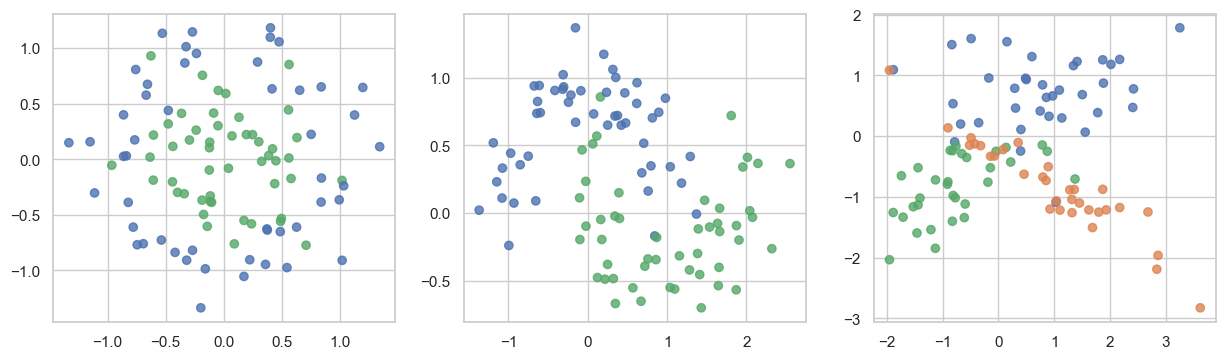

In [4]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__Задание 1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [5]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

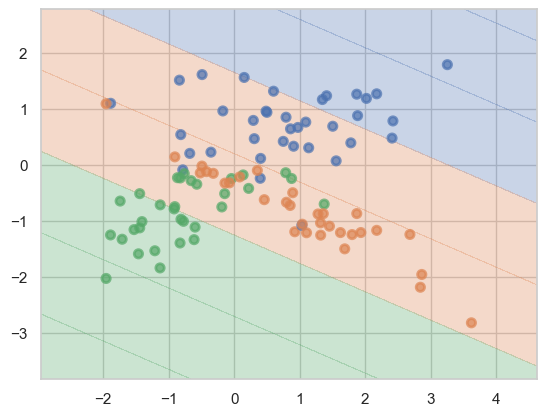

In [6]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

Датасет кругов

accuracy on train: 1.0
accuracy on test: 0.7666666666666667


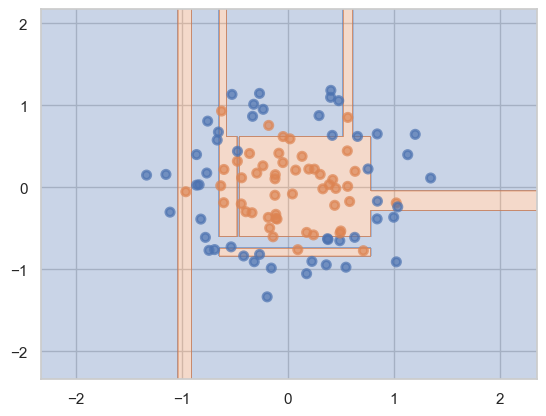

In [7]:
from sklearn.metrics import accuracy_score

X, y = datasets[0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

plot_surface(clf, X, y)
accuracy = accuracy_score(y_test, y_pred)
print('accuracy on train:', accuracy_score(y_train, clf.predict(X_train)))
print('accuracy on test:', accuracy)

Датасет лун

accuracy on train: 1.0
accuracy on test: 0.7666666666666667


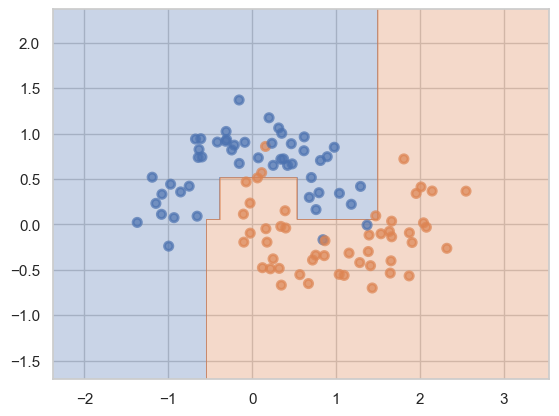

In [8]:
from sklearn.metrics import accuracy_score

X, y = datasets[1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

plot_surface(clf, X, y)
print('accuracy on train:', accuracy_score(y_train, clf.predict(X_train)))
print('accuracy on test:', accuracy)

__Ответ:__

Глядя на разницу test_accuracy и train_accuracy, делаем вывод что деревья достаточно переобучились, при этом картинки выглядят достаточно логично

__Задание 2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

In [9]:
X, y = datasets[0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
param_grid = {
    'max_depth': [None, 2, 4, 6],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3],
}

In [11]:
def plot_surface(clf, X, y, ax):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = ax.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

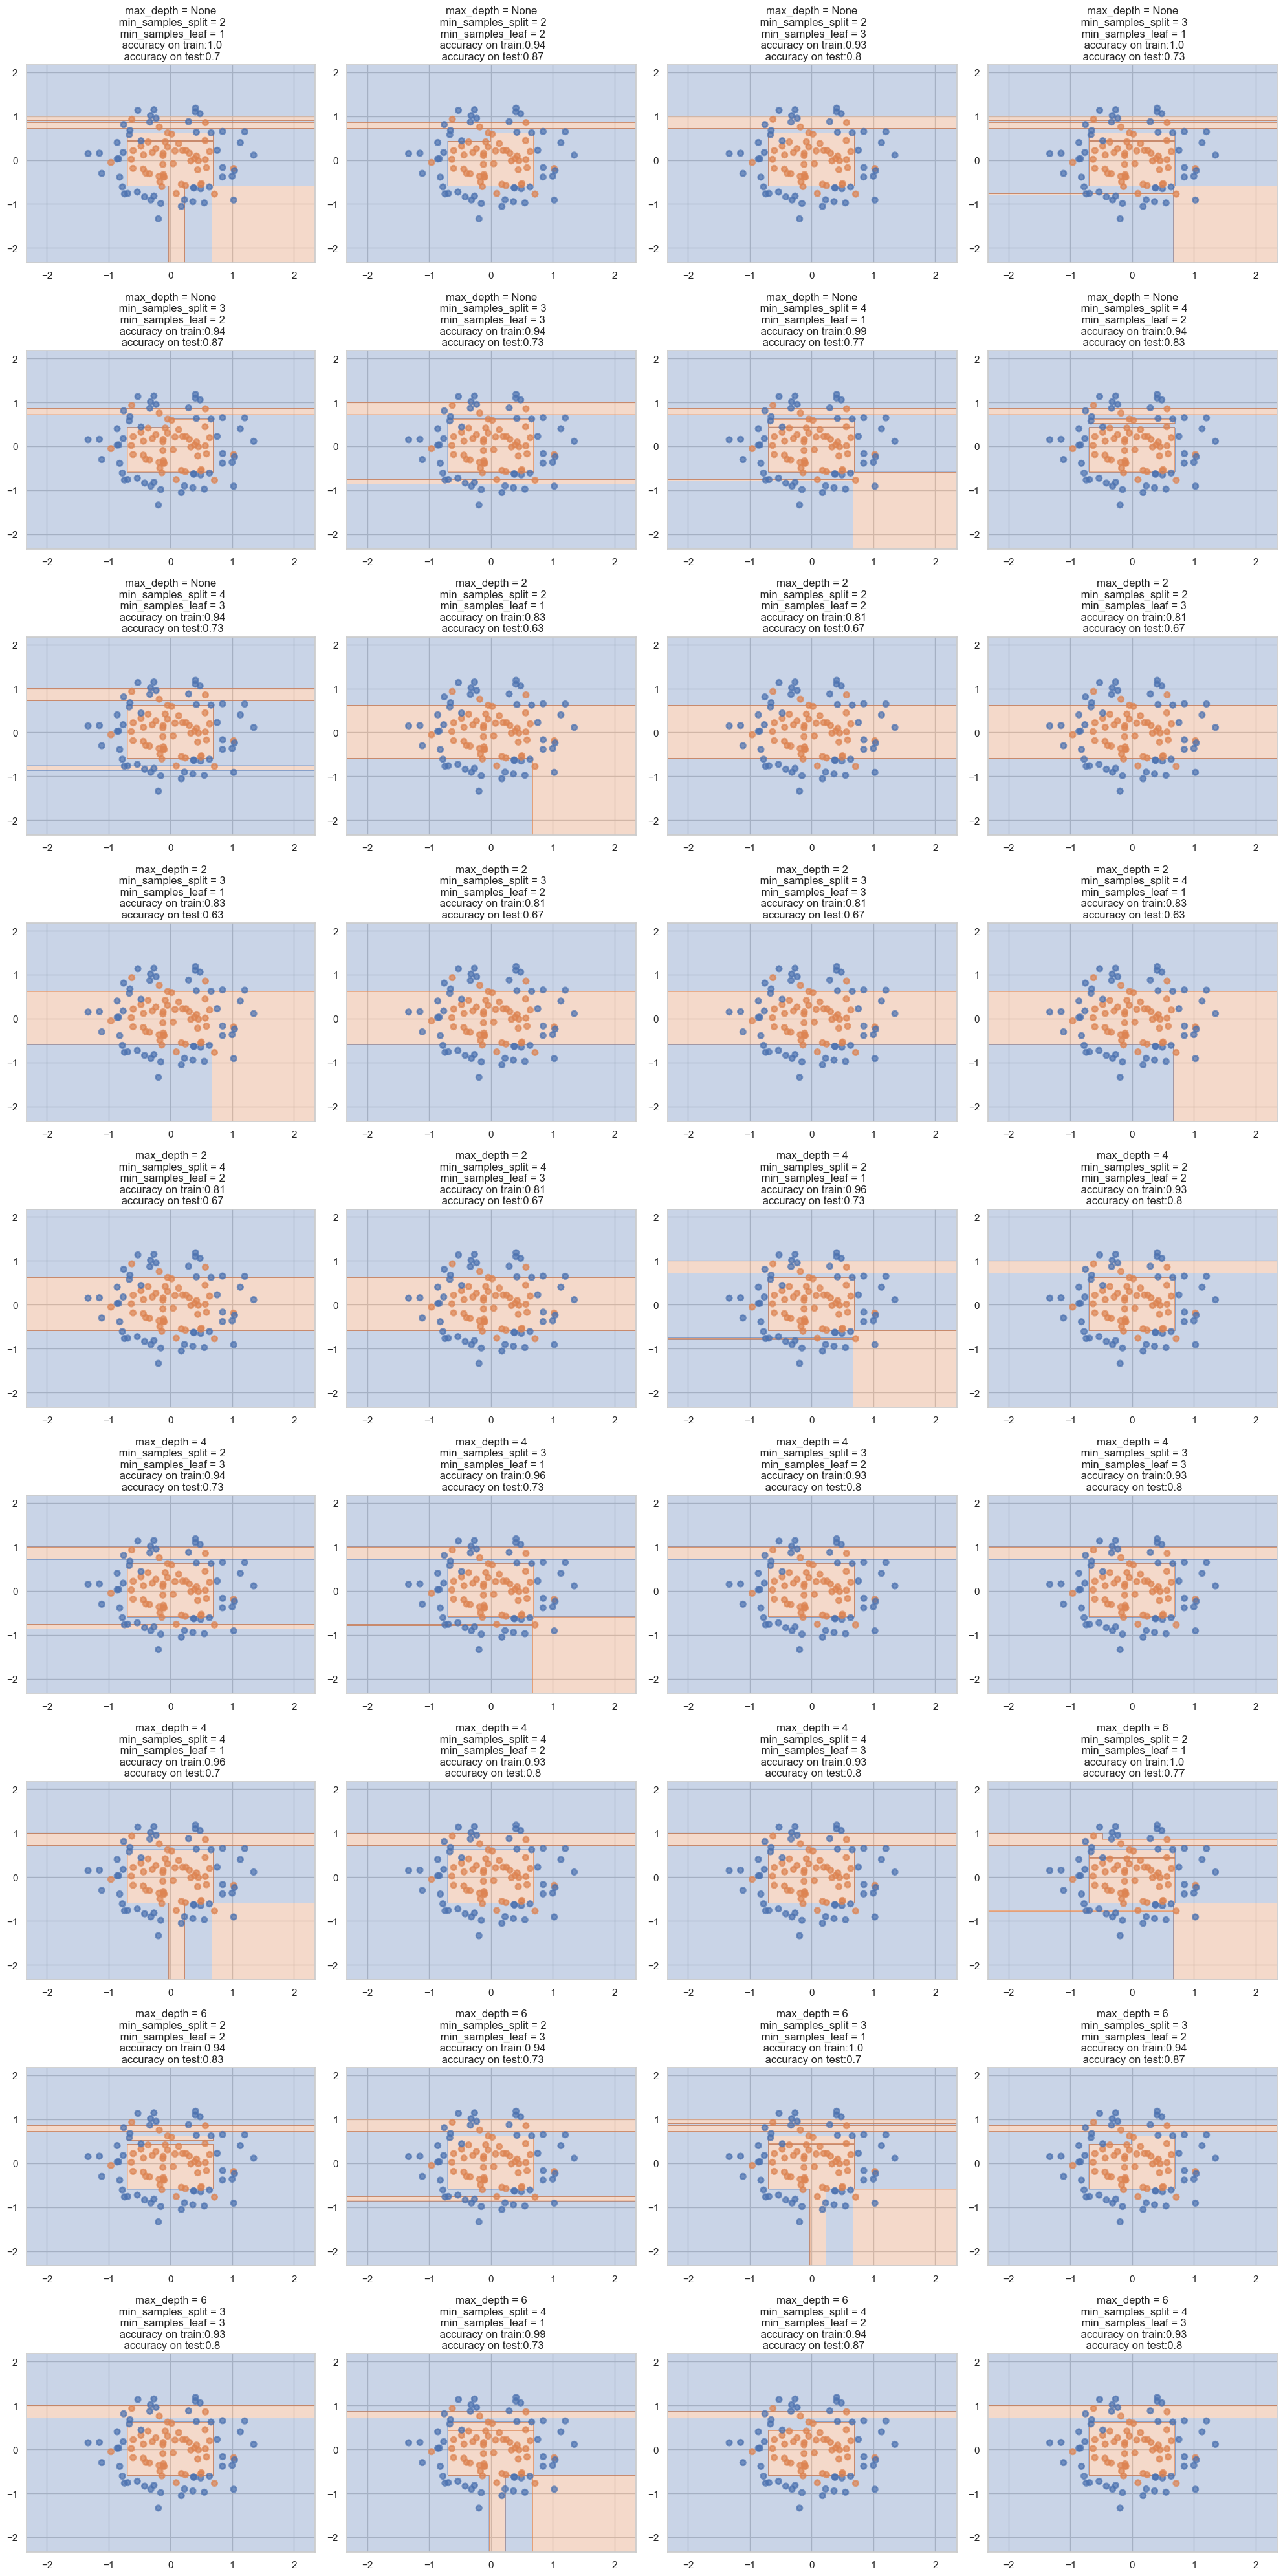

In [12]:
fig, axes = plt.subplots(figsize=(20, 40), ncols=4, nrows=9)

graph_ind = 0

for max_depth in param_grid['max_depth']:
    for min_samples_split in param_grid['min_samples_split']:
        for min_samples_leaf in param_grid['min_samples_leaf']:
            clf = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            ax = axes[graph_ind//4][graph_ind%4]
            plot_surface(clf, X, y, ax)
            graph_ind+=1
            accuracy_test = round(accuracy_score(y_test, y_pred), 2)
            accuracy_train = round(accuracy_score(y_train, clf.predict(X_train)), 2)
            ax.set_title(f'max_depth = {max_depth}\n min_samples_split = {min_samples_split}\n min_samples_leaf = {min_samples_leaf}\n accuracy on train:{accuracy_train}\n accuracy on test:{accuracy_test}')
plt.tight_layout()

In [13]:
X, y = datasets[1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

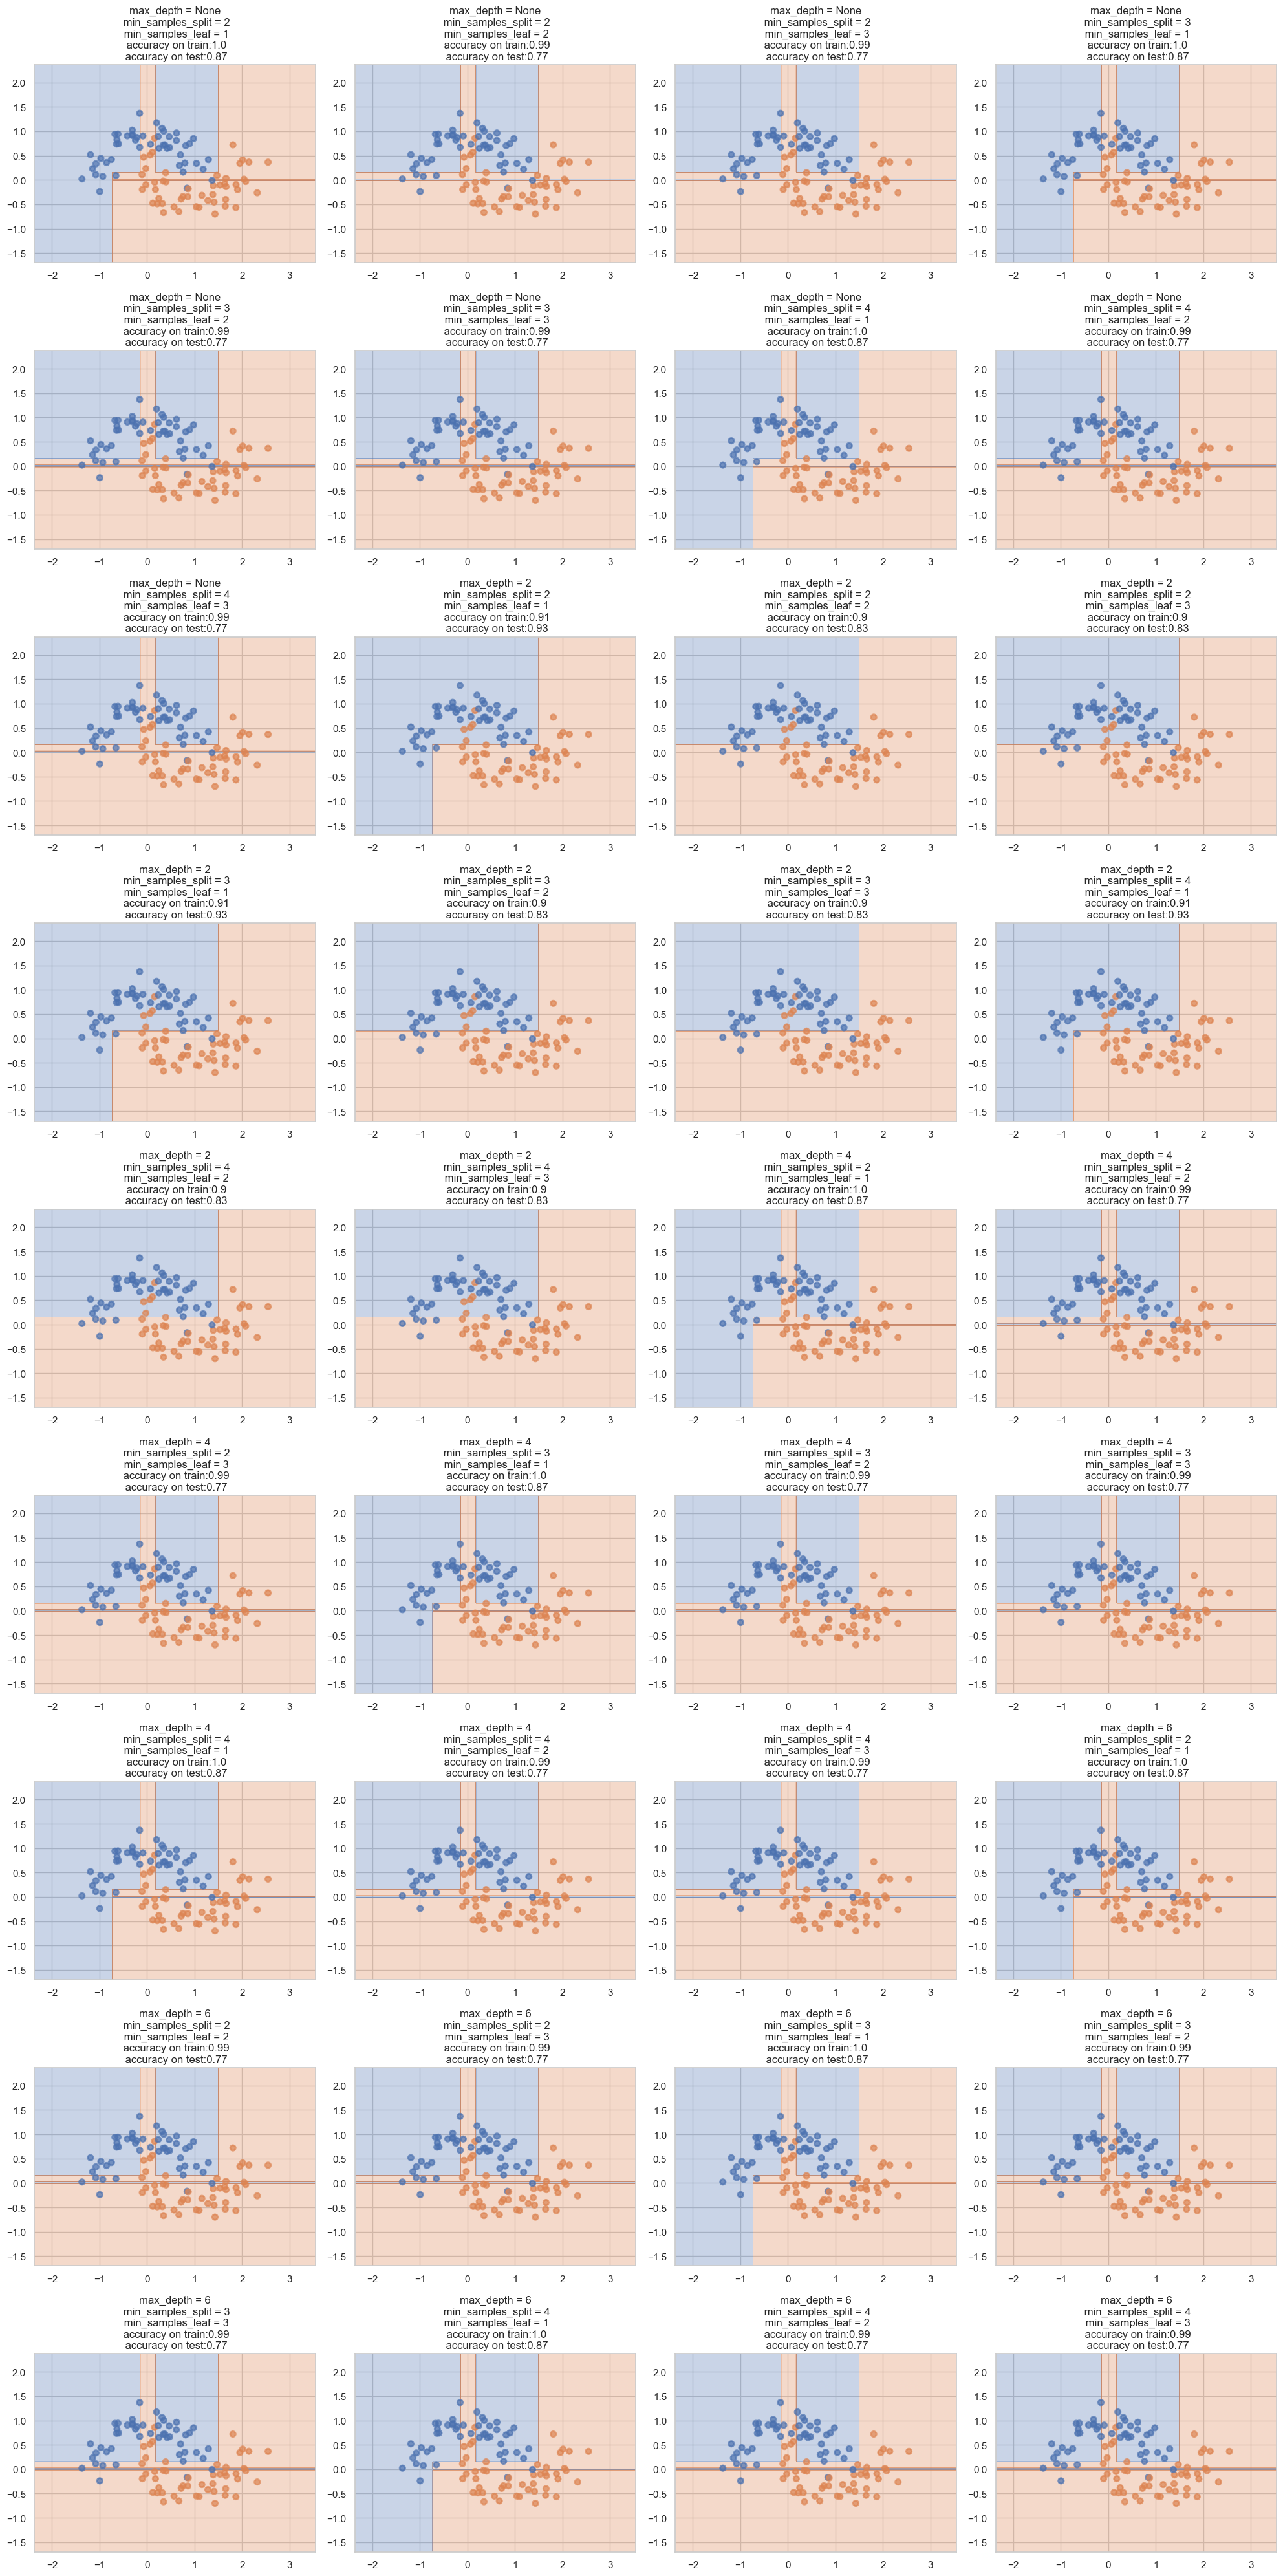

In [14]:
fig, axes = plt.subplots(figsize=(20, 40), ncols=4, nrows=9)

graph_ind = 0

for max_depth in param_grid['max_depth']:
    for min_samples_split in param_grid['min_samples_split']:
        for min_samples_leaf in param_grid['min_samples_leaf']:
            clf = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            ax = axes[graph_ind//4][graph_ind%4]
            plot_surface(clf, X, y, ax)
            graph_ind+=1
            accuracy_test = round(accuracy_score(y_test, y_pred), 2)
            accuracy_train = round(accuracy_score(y_train, clf.predict(X_train)), 2)
            ax.set_title(f'max_depth = {max_depth}\n min_samples_split = {min_samples_split}\n min_samples_leaf = {min_samples_leaf}\n accuracy on train:{accuracy_train}\n accuracy on test:{accuracy_test}')
plt.tight_layout()

__Ответ:__

При маленьких max_depth, разделяющая поверность сильно отличается от истинного разбиения, потому что дереву не удается выявить зависимости.

При увеличении min_samples_leaf и min_samples_split, обобщающая способность повышается, но качество падает, так как дерево начинает относить разные объекты в одну группу.

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw5code.py

__Задание 4. (0.5 балла)__

Загрузите таблицу [students.csv](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/homeworks-practice/homework-practice-05-trees/students.csv) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [15]:
from hw5code import find_best_split

df = pd.read_csv('students.csv')

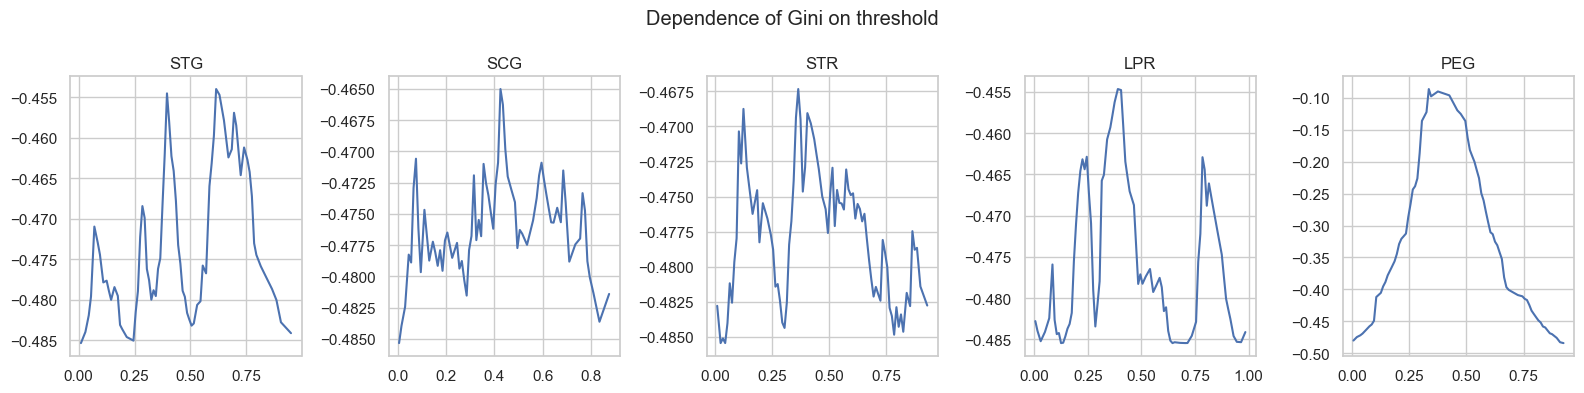

In [16]:
fig, axes = plt.subplots(figsize=(16, 4), ncols=5, nrows=1)
for i in range(5):
    thresholds, ginis, b_th, _ = find_best_split(np.array(df.iloc[:, i].values), np.array(df.iloc[:, 5].values))
    axes[i].plot(thresholds, ginis)
    axes[i].set_title(df.columns[i])
plt.suptitle("Dependence of Gini on threshold")
plt.tight_layout()

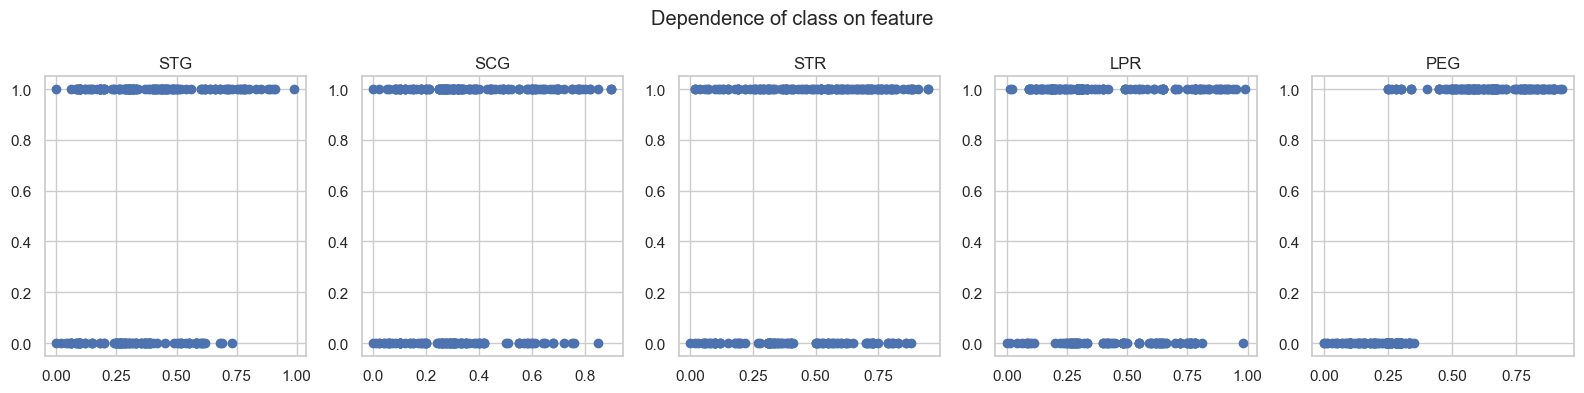

In [17]:
fig, axes = plt.subplots(figsize=(16, 4), ncols=5, nrows=1)
for i in range(5):
    axes[i].scatter(np.array(df.iloc[:, i].values), np.array(df.iloc[:, 5].values))
    axes[i].set_title(df.columns[i])
plt.suptitle("Dependence of class on feature")
plt.tight_layout()

__Задание 5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:**

Исходя из кривые, стоит производить деление по признаку "PEG". Этот результат хорошо согласуется со scatter-графиками. Такие "хорошие" кривые я бы охарактеризовал как унимодальные, с хорошо выраженным пиком. Если деление по признаку практически невозможно, то при небольших изменениях threshold, значение gini будет сильно меняться, причем немонотонно.

__Задание 6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw5code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в [лекции](https://github.com/esokolov/ml-course-hse/blob/master/2020-fall/lecture-notes/lecture07-trees.pdf) в разделе «Построение дерева». Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

__Задание 7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (из [Data Folder](https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/)), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [18]:
from hw5code import DecisionTree

df = pd.read_csv('agaricus-lepiota.data')

In [19]:
from sklearn.preprocessing import LabelEncoder

for column in df.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])

X = df
X = X.drop(columns='p')
y = df['p']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

In [21]:
tree = DecisionTree(['categorical']*X.shape[1])

In [22]:
tree.fit(X_train.values, y_train.values)

In [23]:
accuracy = 1 - np.nonzero(tree.predict(X_test.values) - y_test)[0].shape[0]/y_test.shape[0]
print('accuracy =', accuracy)

accuracy = 1.0


__Задание 8. (бонус, 1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (см. следующий пункт).

In [137]:
from sklearn.utils import shuffle

df = pd.read_csv('tic-tac-toe-endgame.csv')
df = shuffle(df)

for column in df.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])

X = df
X = X.drop(columns='V10')
y = df['V10']

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

In [139]:
depths = np.arange(10)
min_samples_splits = np.arange(10)
min_samples_leafs = np.arange(10)

depth_stats = []
min_samples_split_stats = []
min_samples_leaf_stats = []

for depth in depths:
    tree = DecisionTree(['categorical']*X.shape[1], max_depth=depth)
    tree.fit(X_train.values, y_train.values)
    accuracy = 1 - np.nonzero(tree.predict(X_test.values) - y_test)[0].shape[0]/y_test.shape[0]
    depth_stats.append(accuracy)

for split in min_samples_splits:
    tree = DecisionTree(['categorical']*X.shape[1], min_samples_split=split)
    tree.fit(X_train.values, y_train.values)
    accuracy = 1 - np.nonzero(tree.predict(X_test.values) - y_test)[0].shape[0]/y_test.shape[0]
    min_samples_split_stats.append(accuracy)

for leaf in min_samples_leafs:
    tree = DecisionTree(['categorical']*X.shape[1], min_samples_leaf=leaf)
    tree.fit(X_train.values, y_train.values)
    accuracy = 1 - np.nonzero(tree.predict(X_test.values) - y_test)[0].shape[0]/y_test.shape[0]
    min_samples_leaf_stats.append(accuracy)

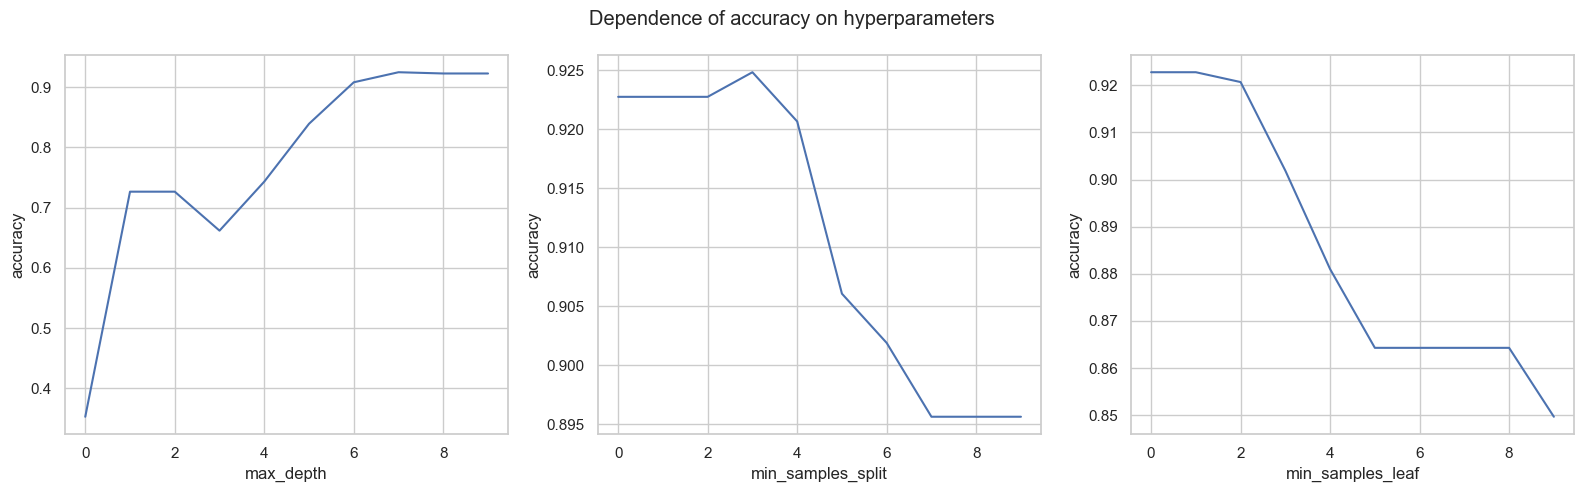

In [140]:
fig, axes = plt.subplots(figsize=(16, 5), ncols=3, nrows=1)
axes[0].plot(depths, depth_stats)
axes[0].set_xlabel('max_depth')
axes[0].set_ylabel('accuracy')
axes[1].plot(min_samples_splits, min_samples_split_stats)
axes[1].set_xlabel('min_samples_split')
axes[1].set_ylabel('accuracy')
axes[2].plot(min_samples_leafs, min_samples_leaf_stats)
axes[2].set_xlabel('min_samples_leaf')
axes[2].set_ylabel('accuracy')
plt.suptitle("Dependence of accuracy on hyperparameters")
plt.tight_layout()

__Задание 9. (2 балла)__

Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names): 
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце),
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами (что тоже, в целом, не очень сложно).

mushrooms

In [120]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.preprocessing import LabelEncoder
from hw5code import DecisionTree

df = pd.read_csv('agaricus-lepiota.data')
df = shuffle(df)

for column in df.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])

X = df
X = X.drop(columns='p')
y = df['p']

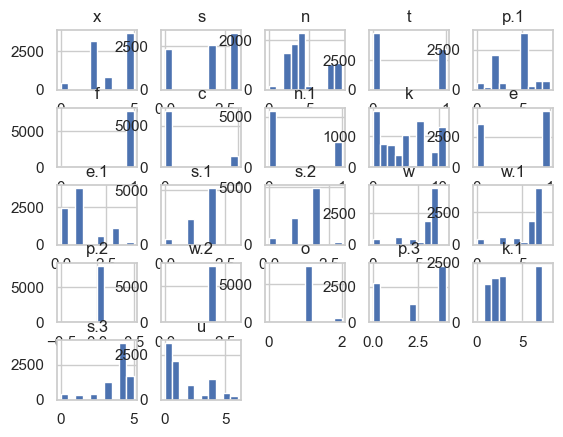

In [121]:
X.hist()
plt.show()

In [122]:
from sklearn.preprocessing import OneHotEncoder

model = DecisionTreeClassifier()
scores = cross_val_score(model, X.values, y.values, cv=10, scoring=make_scorer(accuracy_score))
score_sklearn = scores.mean()

model = DecisionTree(['real']*X.shape[1])
scores = cross_val_score(model, X.values, y.values, cv=10, scoring=make_scorer(accuracy_score))
score_real = scores.mean()

model = DecisionTree(['categorical']*X.shape[1])
scores = cross_val_score(model, X.values, y.values, cv=10, scoring=make_scorer(accuracy_score))
score_cat = scores.mean()

encoder = OneHotEncoder(sparse_output=False)
X = encoder.fit_transform(X)
model = DecisionTree(['real']*X.shape[1])
scores = cross_val_score(model, X, y.values, cv=10, scoring=make_scorer(accuracy_score))
score_ohe = scores.mean()

data = [['mushrooms', score_sklearn, score_cat, score_real, score_ohe]]

columns = ['dataset', 'real', 'categorical', 'ohe', 'sklearn']

stats = pd.DataFrame(data, columns=columns)

tic-tac-toe-endgame

In [123]:
df = pd.read_csv('tic-tac-toe-endgame.csv')
df = shuffle(df)

for column in df.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])

X = df
X = X.drop(columns='V10')
y = df['V10']

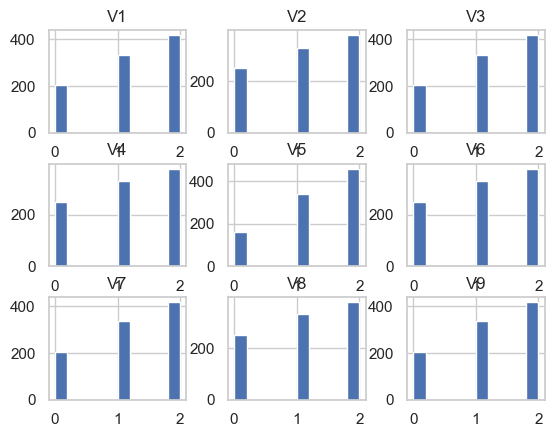

In [124]:
X.hist()
plt.show()

In [125]:
model = DecisionTreeClassifier()
scores = cross_val_score(model, X.values, y.values, cv=10, scoring=make_scorer(accuracy_score))
score_sklearn = scores.mean()

model = DecisionTree(['real']*X.shape[1])
scores = cross_val_score(model, X.values, y.values, cv=10, scoring=make_scorer(accuracy_score))
score_real = scores.mean()

model = DecisionTree(['categorical']*X.shape[1])
scores = cross_val_score(model, X.values, y.values, cv=10, scoring=make_scorer(accuracy_score))
score_cat = scores.mean()

encoder = OneHotEncoder(sparse_output=False)
X = encoder.fit_transform(X)
model = DecisionTree(['real']*X.shape[1])
scores = cross_val_score(model, X, y.values, cv=10, scoring=make_scorer(accuracy_score))
score_ohe = scores.mean()

new_row = pd.DataFrame({'dataset':'tic-tac-toe', 'real':[score_real], 'categorical':[score_cat], 'ohe':[score_ohe], 'sklearn':[score_sklearn]})
stats = pd.concat([stats, new_row], ignore_index=True)

cars

In [126]:
df = pd.read_csv('car.data')
df['unacc'] = ~(df['unacc'] == 'unacc')

for column in df.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])

X = df
X = X.drop(columns='unacc')
y = df['unacc']

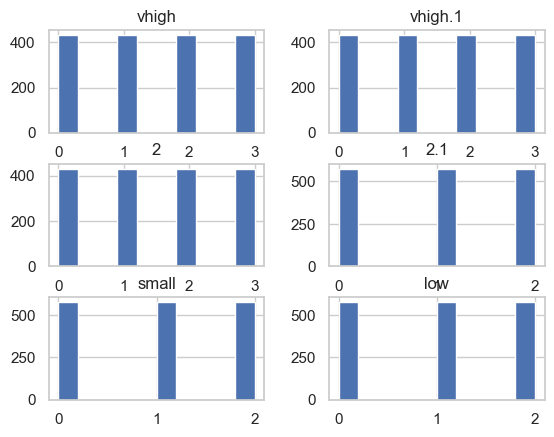

In [127]:
X.hist()
plt.show()

In [128]:
model = DecisionTreeClassifier()
scores = cross_val_score(model, X.values, y.values, cv=10, scoring=make_scorer(accuracy_score))
score_sklearn = scores.mean()

model = DecisionTree(['real']*X.shape[1])
scores = cross_val_score(model, X.values, y.values, cv=10, scoring=make_scorer(accuracy_score))
score_real = scores.mean()

model = DecisionTree(['categorical']*X.shape[1])
scores = cross_val_score(model, X.values, y.values, cv=10, scoring=make_scorer(accuracy_score))
score_cat = scores.mean()

encoder = OneHotEncoder(sparse_output=False)
X = encoder.fit_transform(X)
model = DecisionTree(['real']*X.shape[1])
scores = cross_val_score(model, X, y.values, cv=10, scoring=make_scorer(accuracy_score))
score_ohe = scores.mean()

new_row = pd.DataFrame({'dataset':'cars', 'real':[score_real], 'categorical':[score_cat], 'ohe':[score_ohe], 'sklearn':[score_sklearn]})
stats = pd.concat([stats, new_row], ignore_index=True)

nursery

In [129]:
df = pd.read_csv('nursery.data')
df['recommend'] = ~((df['recommend'] == 'recommend') | (df['recommend'] == 'not_recom'))

for column in df.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])

X = df
X = X.drop(columns='recommend')
y = df['recommend']

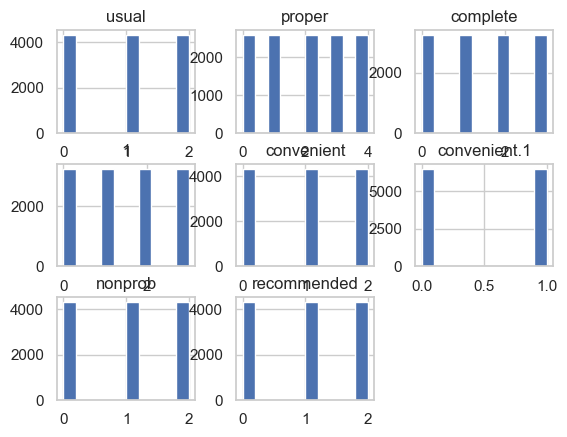

In [130]:
X.hist()
plt.show()

In [131]:
model = DecisionTreeClassifier()
scores = cross_val_score(model, X.values, y.values, cv=10, scoring=make_scorer(accuracy_score))
score_sklearn = scores.mean()

model = DecisionTree(['real']*X.shape[1])
scores = cross_val_score(model, X.values, y.values, cv=10, scoring=make_scorer(accuracy_score))
score_real = scores.mean()

model = DecisionTree(['categorical']*X.shape[1])
scores = cross_val_score(model, X.values, y.values, cv=10, scoring=make_scorer(accuracy_score))
score_cat = scores.mean()

encoder = OneHotEncoder(sparse_output=False)
X = encoder.fit_transform(X)
model = DecisionTree(['real']*X.shape[1])
scores = cross_val_score(model, X, y.values, cv=10, scoring=make_scorer(accuracy_score))
score_ohe = scores.mean()

new_row = pd.DataFrame({'dataset':'nursery', 'real':[score_real], 'categorical':[score_cat], 'ohe':[score_ohe], 'sklearn':[score_sklearn]})
stats = pd.concat([stats, new_row], ignore_index=True)

In [132]:
stats = stats.set_index('dataset')
stats

,real,categorical,ohe,sklearn
dataset,,,,
mushrooms,1.000000,1.000000,1.000000,1.000000
tic-tac-toe,0.856985,0.944704,0.943640,0.881996
cars,0.920198,0.953710,0.928277,0.904601
nursery,0.999846,0.999923,0.999769,0.999846


__Задание 10. (1 балла)__

Проанализируйте результаты эксперимента. 
Одинаково ли для разных наборов данных ранжируются алгоритмы? 
Порассуждайте, почему так происходит. 

Обратите внимание на значение признаков в разных наборах данных. 
Присутствует ли в результатах какая-то компонента случайности? 
Можно ли повлиять на нее и улушить работу алгоритмов?

**Ответ:**

Для датасетов mushrooms и nursery сложно что-то сравнивать, все алгоритмы дают почти идеальные результаты. Для tic-tac-toe и cars видно, что алгоритм sklern-а без подбора гиперпараметров хуже всех, алгоритм считающий признаки категориальными лучше всех, на датасете tic-tac-toe алгоритм, считающий признаки вещественными гораздо хуже one-hot, а на датасете cars они примерно похожи.

Видно, что во всех датасетах кроме mushrooms, признаки распределены равномерно, поэтому выбор лучшего признака может происходить случайно.

Вставьте что угодно, описывающее ваши впечатления от этого задания: